### プロファイルの幾何的な表現の作図

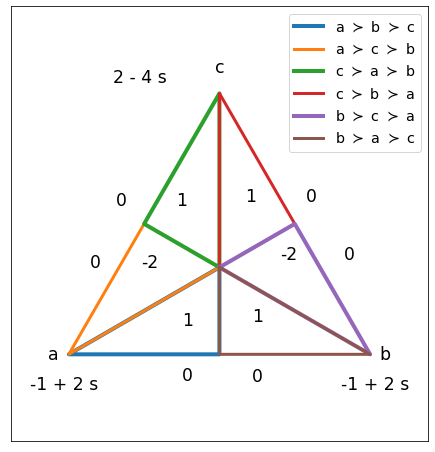

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def pref_str(p): 
    return r' $\succ$ '.join(p)


def draw_geometric_profile_repr(v):
    if isinstance(v[0], str):
        str_prof = True
    else:
        str_prof = False

    alternatives = ('a', 'b', 'c') 
    geom_prefs = (('a', 'b', 'c'), # with Hamming distance = 1
                  ('a', 'c', 'b'),
                  ('c', 'a', 'b'),
                  ('c', 'b', 'a'),
                  ('b', 'c', 'a'),
                  ('b', 'a', 'c'))
    r = 1
    l = 0.4*r
    l2 = 1.1*r
    n = len(alternatives)
    m = len(geom_prefs) #e
    # th = 0.5*np.pi + (2*np.pi/n)*np.arange(n)
    # th = 0.5*np.pi + 2*np.pi/n - (2*np.pi/n)*np.arange(n)
    th = 0.5*np.pi + 2*np.pi/n + (2*np.pi/n)*np.arange(n)
    px = r*np.cos(th)
    py = r*np.sin(th)
    vtx = np.vstack((px, py)).T

    pbx = np.array([np.mean([px[(i+1)%n], px[(i+2)%n]]) for i in range(n)])
    pby = np.array([np.mean([py[(i+1)%n], py[(i+2)%n]]) for i in range(n)])
    pb = np.vstack((pbx, pby)).T

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.0, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])

    if False:
        ax.set_frame_on(False)

    p0 = np.array([0, 0]) # origin

    polys = [
        np.vstack((p0[0:2], vtx[0, 0:2], pb[2, 0:2], p0[0:2])),
        np.vstack((p0[0:2], vtx[0, 0:2], pb[1, 0:2], p0[0:2])),
        np.vstack((p0[0:2], vtx[2, 0:2], pb[1, 0:2], p0[0:2])),
        np.vstack((p0[0:2], vtx[2, 0:2], pb[0, 0:2], p0[0:2])),
        np.vstack((p0[0:2], vtx[1, 0:2], pb[0, 0:2], p0[0:2])),
        np.vstack((p0[0:2], vtx[1, 0:2], pb[2, 0:2], p0[0:2])),
    ]


    lw = [4, 3]
    for i, poly in enumerate(polys):
        # ax.fill(poly[:, 0], poly[:, 1], label=pref_str(geom_prefs[i]))
        ax.plot(poly[:, 0], poly[:, 1], linewidth=lw[i % len(lw)], label=pref_str(geom_prefs[i]))
        # ax.plot(poly[:, 0], poly[:, 1], linewidth=2)

    ax.legend(fontsize='x-large')


    def signed_val_str(v): 
        return f'+ {v}' if v >= 0 else f'- {np.abs(v)}'

    if not str_prof:
        scr_offsets = [(10, -30), (-10, -30), (-80, -10)]
        score_str = [f'{v[0] + v[1]} {signed_val_str(v[2] + v[5])} s', 
                     f'{v[4] + v[5]} {signed_val_str(v[0] + v[3])} s',
                     f'{v[2] + v[3]} {signed_val_str(v[1] + v[4])} s']
    else:
        scr_offsets = [(10, -60), (-10, -60), (-120, -10)]
        score_str = [f'{v[0]} + {v[1]} + ({v[2]} + {v[5]}) $s$', 
                     f'{v[4]} + {v[5]} + ({v[0]} + {v[3]}) $s$',
                     f'{v[2]} + {v[3]} + ({v[1]} + {v[4]}) $s$']

    for i in range(n):
        ax.annotate(alternatives[i], xy=(l2*np.cos(th[i]), l2*np.sin(th[i])),
                    xytext=(0, 0), textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large')

        ax.annotate(score_str[i], xy=(l2*np.cos(th[i]), l2*np.sin(th[i])),
                    xytext=scr_offsets[i], textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large')

    phi = -0.65*np.pi - (2*np.pi/m)*np.arange(m)


    if not str_prof:
        pcd_offsets = [(0, -55), (-55, 0), (-60, 0), (60, 0), (60, 0), (0, -60)]
        pair_cmp_data = [np.sum(v[0:3]), np.sum(v[np.array((5, 0, 1))]), np.sum(v[2:5]), 
                         np.sum(v[1:4]), np.sum(v[np.array((4, 5, 0))]), np.sum(v[3:6])]
    else:
        pcd_offsets = [(-50, -55), (-105, 0), (-105, 0), (105, 0), (105, 0), (50, -60)]
        s = ' + '
        pair_cmp_data = [s.join(v[0:3]), s.join(v[np.array((5, 0, 1))]), s.join(v[2:5]), 
                         s.join(v[1:4]), s.join(v[np.array((4, 5, 0))]), s.join(v[3:6])]


    for i, p in enumerate(geom_prefs):
        ax.annotate(f'{v[i]}', xy=(l*np.cos(phi[i]), l*np.sin(phi[i])),
                    xytext=(0, 0), textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large')

        ax.annotate(f'{pair_cmp_data[i]}', xy=(l*np.cos(phi[i]), l*np.sin(phi[i])),
                    xytext=pcd_offsets[i], textcoords='offset points',
                    horizontalalignment='center',
                    verticalalignment='bottom', fontsize='xx-large')

     
    plt.savefig('geometric_profile_repr.pdf', bbox_inches='tight')

v = np.array([11, 22, 33, 44, 55, 66])
v2 = v[::-1]
d_ab = np.array([[ 1,  1,  1, -1, -1, -1]]).T.ravel()
d_bc = np.array([[ 1, -1, -1, -1,  1,  1]]).T.ravel()
d_ca = np.array([[-1, -1,  1,  1,  1, -1]]).T.ravel()

v3 = np.array(['$v_1$', '$v_2$', '$v_3$', '$v_4$', '$v_5$', '$v_6$'])

K3 = np.array([[ 1,  1,  1,  1,  1,  1]]).T
C3 = np.array([[ 1, -1,  1, -1,  1, -1]]).T
Ba = np.array([[ 1,  1,  0, -1, -1,  0]]).T
Bb = np.array([[ 0, -1, -1,  0,  1,  1]]).T
Bc = np.array([[-1,  0,  1,  1,  0, -1]]).T
Ra = np.array([[ 1,  1, -2,  1,  1, -2]]).T
Rb = np.array([[-2,  1,  1, -2,  1,  1]]).T
Rc = np.array([[ 1, -2,  1,  1, -2,  1]]).T


# draw_geometric_profile_repr(v)
# draw_geometric_profile_repr(v2)
# draw_geometric_profile_repr(d_ab)
# draw_geometric_profile_repr(v3)
# draw_geometric_profile_repr(Ba.ravel())
# draw_geometric_profile_repr(Bb.ravel())
# draw_geometric_profile_repr(Bc.ravel())
# draw_geometric_profile_repr(Ra.ravel())
# draw_geometric_profile_repr(Rb.ravel())
draw_geometric_profile_repr(Rc.ravel())


### $|O|! = 6$ の場合の座標変換と各種の集約ルールの比較
- 同じプロファイルに対して，以下の集約ルールを適用する
  - ペア多数決
  - ボルダルール
  - 単純多数決
  - 反対多数決


In [14]:
import numpy as np
import itertools as it
from IPython.display import display_markdown

K3 = np.array([[ 1,  1,  1,  1,  1,  1]]).T
C3 = np.array([[ 1, -1,  1, -1,  1, -1]]).T
Ra = np.array([[ 1,  1, -2,  1,  1, -2]]).T
Rb = np.array([[-2,  1,  1, -2,  1,  1]]).T
Rc = np.array([[ 1, -2,  1,  1, -2,  1]]).T
Ba = np.array([[ 1,  1,  0, -1, -1,  0]]).T
Bb = np.array([[ 0, -1, -1,  0,  1,  1]]).T
Bc = np.array([[-1,  0,  1,  1,  0, -1]]).T

M = np.hstack((K3, C3, Ra, Rb, Ba, Bb))

if False:
    print(repr(M))
    # print(repr(np.linalg.inv(M)))
    print(np.linalg.det(M))
    # print(np.linalg.eig(M))
    print("K3.T @ K3", K3.T @ K3)
    print("C3.T @ C3", C3.T @ C3)
    print("Ra.T @ Rb", Ra.T @ Rb)
    print("Ra.T @ Ra", Ra.T @ Ra)
    print("Rb.T @ Rb", Rb.T @ Rb)
    print("Ba.T @ Ba", Ba.T @ Ba)
    print("Bb.T @ Bb", Bb.T @ Bb)
    print("Ba.T @ Bb", Ba.T @ Bb)
    # print(Ba.T.dot(Bb))

nm_K3 = np.linalg.norm(K3)
nm_C3 = np.linalg.norm(C3)
nm_Ra = np.linalg.norm(Ra) 
nm_Rb = np.linalg.norm(Rb) 
Rb_perp = Rb - ((Rb.T @ Ra)/(Ra.T @ Ra))[0,0]*Ra 
nm_Rb_perp = np.linalg.norm(Rb_perp)

if False:
    print("nm_Rb_perp", nm_Rb_perp)
    print("orthogonal?", Ra.T @ Rb_perp)

nm_Ba = np.linalg.norm(Ba) 
nm_Bb = np.linalg.norm(Bb) 
Bb_perp = Bb - ((Bb.T @ Ba)/(Ba.T @ Ba))[0,0]*Ba 
nm_Bb_perp = np.linalg.norm(Bb_perp)

if False:
    print("nm_Bb_perp", nm_Bb_perp)
    print("orthogonal?", Ba.T @ Bb_perp)
    print("det(M)", nm_K3*nm_C3*nm_Ra*nm_Rb_perp*nm_Ba*nm_Bb_perp)

# print((Bb.T @ Ba)/(Ba.T @ Ba))
# print(Bb - ((Bb.T @ Ba)/(Ba.T @ Ba))[0,0]*Ba)



if False:
    print(sa.T @ C3)
    print(sb.T @ C3)
    print(sc.T @ C3)
    print(sa.T @ Ra)
    print(sb.T @ Rb)
    print(sc.T @ Rc)
    print(sa.T @ Ba)
    print(sb.T @ Bb)
    print(sc.T @ Bc)

sgn_to_pref = {
    (+1, +1, -1): (('a', 'b', 'c'), (r'\succ', r'\succ')), 
    (+1, -1, -1): (('a', 'c', 'b'), (r'\succ', r'\succ')), 
    (+1, -1, +1): (('c', 'a', 'b'), (r'\succ', r'\succ')), 
    (-1, -1, +1): (('c', 'b', 'a'), (r'\succ', r'\succ')), 
    (-1, +1, +1): (('b', 'c', 'a'), (r'\succ', r'\succ')), 
    (-1, +1, -1): (('b', 'a', 'c'), (r'\succ', r'\succ')), 

    ( 0, +1, -1): (('a', 'b', 'c'), (r'\sim',  r'\succ')), 
    ( 0, -1, +1): (('c', 'a', 'b'), (r'\succ', r'\sim')), 
    (+1,  0, -1): (('a', 'b', 'c'), (r'\succ', r'\sim')), 
    (-1,  0, +1): (('b', 'c', 'a'), (r'\sim',  r'\succ')), 
    (+1, -1,  0): (('c', 'a', 'b'), (r'\sim',  r'\succ')), 
    (-1, +1,  0): (('b', 'c', 'a'), (r'\succ', r'\sim')), 

    ( 0,  0,  0): (('a', 'b', 'c'), (r'\sim', r'\sim')), 

    ( 0,  0, +1): ((r'\text{Cyclic:} a', 'b', 'c', 'a'), (r'\sim',  r'\sim',  r'\succ', r'\cdots')), 
    ( 0, +1,  0): ((r'\text{Cyclic:} a', 'b', 'c', 'a'), (r'\sim',  r'\succ', r'\sim',  r'\cdots')), 
    ( 0, +1, +1): ((r'\text{Cyclic:} a', 'b', 'c', 'a'), (r'\sim',  r'\succ', r'\succ', r'\cdots')), 
    (+1,  0,  0): ((r'\text{Cyclic:} a', 'b', 'c', 'a'), (r'\succ', r'\sim',  r'\sim',  r'\cdots')), 
    (+1,  0, +1): ((r'\text{Cyclic:} a', 'b', 'c', 'a'), (r'\succ', r'\sim',  r'\succ', r'\cdots')), 
    (+1, +1,  0): ((r'\text{Cyclic:} a', 'b', 'c', 'a'), (r'\succ', r'\succ', r'\sim',  r'\cdots')), 
    (+1, +1, +1): ((r'\text{Cyclic:} a', 'b', 'c', 'a'), (r'\succ', r'\succ', r'\succ', r'\cdots')), 

    ( 0,  0, -1): ((r'\text{Cyclic:} c', 'b', 'a', 'c'), (r'\sim',  r'\sim',  r'\succ', r'\cdots')), 
    ( 0, -1,  0): ((r'\text{Cyclic:} c', 'b', 'a', 'c'), (r'\succ', r'\sim',  r'\sim',  r'\cdots')), 
    ( 0, -1, -1): ((r'\text{Cyclic:} c', 'b', 'a', 'c'), (r'\succ', r'\sim',  r'\succ', r'\cdots')), 
    (-1,  0,  0): ((r'\text{Cyclic:} c', 'b', 'a', 'c'), (r'\sim',  r'\succ', r'\sim',  r'\cdots')), 
    (-1,  0, -1): ((r'\text{Cyclic:} c', 'b', 'a', 'c'), (r'\sim',  r'\succ', r'\succ', r'\cdots')), 
    (-1, -1,  0): ((r'\text{Cyclic:} c', 'b', 'a', 'c'), (r'\succ', r'\succ', r'\sim',  r'\cdots')), 
    (-1, -1, -1): ((r'\text{Cyclic:} c', 'b', 'a', 'c'), (r'\succ', r'\succ', r'\succ', r'\cdots')), 
}


# pref_str = lambda p: r' $\succ$ '.join(p)
def pref_str(pp):
    txt = ''
    s, op = pp
    for i, ss in enumerate(s):
        txt += ss + ' ' + (op[i] if i < len(op) else '') + ' '

    return ' $' + txt + '$ '

if True:
    kp = 13; gm = 0; x = -1; y = -1; z = 6; w = 3

elif True:
    kp = 13; gm = 0; x = 2; y = 2; z = 6; w = 3

elif False:
    # cyclic with pairwise majority rule
    kp = 13; gm = 4; x = 1; y = 0; z = 6; w = 3

elif False:
    # cyclic with pairwise majority rule
    kp = 13; gm = 4; x = 0; y = 0; z = 6; w = 3

elif False:
    # different order for pairwise majority, plurality and antiplurality
    kp = 33; gm = 0; x = 1; y = 4; z = 16; w = 10

elif True:
    # different order for pairwise majority, and Borda rule
    kp = 33; gm = 5; x = 3; y = 4; z = 16; w = 10

else:
    # paradoxical votes: 
    #   a > b > c for plurality, but c > b > a for antiplurality 
    kp = 30; gm = 4;  x = 3;  y = 1; z = 6; w = 3
    # v.T =  [[37 37 24 23 41 18]]

# v = x*Ba + y*Bb
# v = gm*C3 + x*Ba + y*Bb
v = kp*K3 + gm*C3 + x*Ba + y*Bb + z*Ra + w*Rb 
print('v.T = ', v.T)

# pairwise majority rule
def pairwise_majority_rule(v):
    d_ab = np.array([[ 1,  1,  1, -1, -1, -1]]).T
    d_bc = np.array([[ 1, -1, -1, -1,  1,  1]]).T
    d_ca = np.array([[-1, -1,  1,  1,  1, -1]]).T
    tau_ab = (d_ab.T @ v)[0, 0]
    tau_bc = (d_bc.T @ v)[0, 0]
    tau_ca = (d_ca.T @ v)[0, 0]
    # sgn_tau_ab, sgn_tau_bc, sgn_tau_ca = np.sign([tau_ab, tau_bc, tau_ca])

    display_markdown(r'$\tau(a, b)$ = ' + f'{tau_ab}  \n' + 
                    r'$\tau(b, c)$ = ' + f'{tau_bc}  \n' +
                    r'$\tau(c, a)$ = ' + f'{tau_ca}  \n', raw=True)


    sgn = tuple(np.int64(np.sign((tau_ab, tau_bc, tau_ca))))
    return sgn_to_pref[sgn]

def scoring_rule(v, s):
    sa = np.array([[1, 1, s, 0, 0, s]]).T
    sb = np.array([[s, 0, 0, s, 1, 1]]).T
    sc = np.array([[0, s, 1, 1, s, 0]]).T
    pa = (sa.T @ v)[0, 0]
    pb = (sb.T @ v)[0, 0]
    pc = (sc.T @ v)[0, 0]
    display_markdown(f'$(p_a, p_b, p_c)$ = ({pa}, {pb}, {pc})  \n', raw=True)

    eta_ab = pa - pb
    eta_bc = pb - pc
    eta_ca = pc - pa
    display_markdown(r'$\eta(a, b)$ = ' + f'{eta_ab}  \n' + 
                     r'$\eta(b, c)$ = ' + f'{eta_bc}  \n' +
                     r'$\eta(c, a)$ = ' + f'{eta_ca}  \n', raw=True)

    sgn = tuple(np.int64(np.sign((eta_ab, eta_bc, eta_ca))))
    return sgn_to_pref[sgn]

def borda_rule(v):
    return scoring_rule(v, 1/2)

# display_markdown('  \n'.join(r'$\tau(' + f'{x},{y})$'), raw=True)
display_markdown('Pairwise majority rule:  \n' + 
                 pref_str(pairwise_majority_rule(v)), raw=True)

display_markdown('Borda rule:  \n' + 
                 pref_str(borda_rule(v)), raw=True)

display_markdown('Plurality voting rule:  \n' + 
                 pref_str(scoring_rule(v, 0)), raw=True)

display_markdown('Antiplurality voting rule:  \n' + 
                 pref_str(scoring_rule(v, 1)), raw=True)

v.T =  [[12 22  5 14 22  3]]


$\tau(a, b)$ = 0  
$\tau(b, c)$ = -4  
$\tau(c, a)$ = 4  


Pairwise majority rule:  
 $c \succ a \sim b  $ 

$(p_a, p_b, p_c)$ = (38.0, 38.0, 41.0)  


$\eta(a, b)$ = 0.0  
$\eta(b, c)$ = -3.0  
$\eta(c, a)$ = 3.0  


Borda rule:  
 $c \succ a \sim b  $ 

$(p_a, p_b, p_c)$ = (34, 25, 19)  


$\eta(a, b)$ = 9  
$\eta(b, c)$ = 6  
$\eta(c, a)$ = -15  


Plurality voting rule:  
 $a \succ b \succ c  $ 

$(p_a, p_b, p_c)$ = (42, 51, 63)  


$\eta(a, b)$ = -9  
$\eta(b, c)$ = -12  
$\eta(c, a)$ = 21  


Antiplurality voting rule:  
 $c \succ b \succ a  $ 

---
- 以降のセルを正常に実行するには Notebook の最初から順にセルを実行しておく必要がある。

$\tau(a, b)$, $\tau(b, c)$, $\tau(c, a)$ の符号とペア多数決の集約結果

In [13]:
# md_text = '  \n'.join(f'{i}: ' + pref_str(v) for i, v in enumerate(sgn_to_pref2.values()))
md_text = '  \n'.join(f'{i}: &emsp; {k} &emsp;' + pref_str(v) for i, (k, v) in enumerate(sgn_to_pref.items()))
display_markdown(md_text, raw=True)

0: &emsp; (1, 1, -1) &emsp; $a \succ b \succ c  $   
1: &emsp; (1, -1, -1) &emsp; $a \succ c \succ b  $   
2: &emsp; (1, -1, 1) &emsp; $c \succ a \succ b  $   
3: &emsp; (-1, -1, 1) &emsp; $c \succ b \succ a  $   
4: &emsp; (-1, 1, 1) &emsp; $b \succ c \succ a  $   
5: &emsp; (-1, 1, -1) &emsp; $b \succ a \succ c  $   
6: &emsp; (0, 1, -1) &emsp; $a \sim b \succ c  $   
7: &emsp; (0, -1, 1) &emsp; $c \succ a \sim b  $   
8: &emsp; (1, 0, -1) &emsp; $a \succ b \sim c  $   
9: &emsp; (-1, 0, 1) &emsp; $b \sim c \succ a  $   
10: &emsp; (1, -1, 0) &emsp; $c \sim a \succ b  $   
11: &emsp; (-1, 1, 0) &emsp; $b \succ c \sim a  $   
12: &emsp; (0, 0, 0) &emsp; $a \sim b \sim c  $   
13: &emsp; (0, 0, 1) &emsp; $\text{Cyclic:} a \sim b \sim c \succ a \cdots $   
14: &emsp; (0, 1, 0) &emsp; $\text{Cyclic:} a \sim b \succ c \sim a \cdots $   
15: &emsp; (0, 1, 1) &emsp; $\text{Cyclic:} a \sim b \succ c \succ a \cdots $   
16: &emsp; (1, 0, 0) &emsp; $\text{Cyclic:} a \succ b \sim c \sim a \cdots $   
17: &emsp; (1, 0, 1) &emsp; $\text{Cyclic:} a \succ b \sim c \succ a \cdots $   
18: &emsp; (1, 1, 0) &emsp; $\text{Cyclic:} a \succ b \succ c \sim a \cdots $   
19: &emsp; (1, 1, 1) &emsp; $\text{Cyclic:} a \succ b \succ c \succ a \cdots $   
20: &emsp; (0, 0, -1) &emsp; $\text{Cyclic:} c \sim b \sim a \succ c \cdots $   
21: &emsp; (0, -1, 0) &emsp; $\text{Cyclic:} c \succ b \sim a \sim c \cdots $   
22: &emsp; (0, -1, -1) &emsp; $\text{Cyclic:} c \succ b \sim a \succ c \cdots $   
23: &emsp; (-1, 0, 0) &emsp; $\text{Cyclic:} c \sim b \succ a \sim c \cdots $   
24: &emsp; (-1, 0, -1) &emsp; $\text{Cyclic:} c \sim b \succ a \succ c \cdots $   
25: &emsp; (-1, -1, 0) &emsp; $\text{Cyclic:} c \succ b \succ a \sim c \cdots $   
26: &emsp; (-1, -1, -1) &emsp; $\text{Cyclic:} c \succ b \succ a \succ c \cdots $ 

LaTeX 用の表の生成($\tau(a, b)$, $\tau(b, c)$, $\tau(c, a)$ の符号とペア多数決の集約結果)

In [13]:
sz = r'\scriptstyle '
def pref_str_tex(pp):
    txt = ''
    s, op = pp
    for i, ss in enumerate(s):
        txt += ss + ' ' + (op[i] if i < len(op) else '') + ' '
    return f' ${sz}' + txt + '$ '

def sign_str(s):
    return f'${sz}+$' if s > 0 else (f'${sz}-$' if s < 0 else f'${sz} 0$')
    # return '$+$' if s > 0 else ('$-$' if s < 0 else '0')

latex_text = (r'\\' + '\n').join(f' & '.join(sign_str(s) for s in k) + 
        ' & ' + pref_str_tex(v)  for i, (k, v) in enumerate(sgn_to_pref.items()))

print(latex_text)

$\scriptstyle +$ & $\scriptstyle +$ & $\scriptstyle -$ &  $\scriptstyle a \succ b \succ c  $ \\
$\scriptstyle +$ & $\scriptstyle -$ & $\scriptstyle -$ &  $\scriptstyle a \succ c \succ b  $ \\
$\scriptstyle +$ & $\scriptstyle -$ & $\scriptstyle +$ &  $\scriptstyle c \succ a \succ b  $ \\
$\scriptstyle -$ & $\scriptstyle -$ & $\scriptstyle +$ &  $\scriptstyle c \succ b \succ a  $ \\
$\scriptstyle -$ & $\scriptstyle +$ & $\scriptstyle +$ &  $\scriptstyle b \succ c \succ a  $ \\
$\scriptstyle -$ & $\scriptstyle +$ & $\scriptstyle -$ &  $\scriptstyle b \succ a \succ c  $ \\
$\scriptstyle  0$ & $\scriptstyle +$ & $\scriptstyle -$ &  $\scriptstyle a \sim b \succ c  $ \\
$\scriptstyle  0$ & $\scriptstyle -$ & $\scriptstyle +$ &  $\scriptstyle c \succ a \sim b  $ \\
$\scriptstyle +$ & $\scriptstyle  0$ & $\scriptstyle -$ &  $\scriptstyle a \succ b \sim c  $ \\
$\scriptstyle -$ & $\scriptstyle  0$ & $\scriptstyle +$ &  $\scriptstyle b \sim c \succ a  $ \\
$\scriptstyle +$ & $\scriptstyle -$ & $\

プロファイル空間の基底ベクトル
$\pmb{K}^3, \pmb{C}^3, \pmb{B}_a, \pmb{B}_b, \pmb{R}_a, \pmb{R}_b $

(選択肢の個数 $|O| = 3$， すなわち，選好タイプの数 $|O|! = 6$  の場合)

In [4]:
import numpy as np

K3 = np.array([[ 1,  1,  1,  1,  1,  1]]).T
C3 = np.array([[ 1, -1,  1, -1,  1, -1]]).T
Ra = np.array([[ 1,  1, -2,  1,  1, -2]]).T
Rb = np.array([[-2,  1,  1, -2,  1,  1]]).T
Rc = np.array([[ 1, -2,  1,  1, -2,  1]]).T
Ba = np.array([[ 1,  1,  0, -1, -1,  0]]).T
Bb = np.array([[ 0, -1, -1,  0,  1,  1]]).T
Bc = np.array([[-1,  0,  1,  1,  0, -1]]).T

M = np.hstack((K3, C3, Ba, Bb, Ra, Rb))

線形独立性の確認

In [7]:
print('det(M) = ', np.linalg.det(M))
print('rank(M) = ', np.linalg.matrix_rank(M))

det(M) =  216.00000000000006
rank(M) =  6


基底ベクトルどうしの直交関係の確認

In [9]:
print('K3.T @ M = ', K3.T @ M)
print('C3.T @ M = ', C3.T @ M)
print('Ba.T @ M = ', Ba.T @ M)
print('Bb.T @ M = ', Bb.T @ M)
print('Ra.T @ M = ', Ra.T @ M)
print('Rb.T @ M = ', Rb.T @ M)


K3.T @ M =  [[6 0 0 0 0 0]]
C3.T @ M =  [[0 6 0 0 0 0]]
Ba.T @ M =  [[ 0  0  4 -2  0  0]]
Bb.T @ M =  [[ 0  0 -2  4  0  0]]
Ra.T @ M =  [[ 0  0  0  0 12 -6]]
Rb.T @ M =  [[ 0  0  0  0 -6 12]]


基本基底・逆転基底それぞれの線形従属性の確認

In [26]:
print('rank([Ra, Rb, Rc]) = ', np.linalg.matrix_rank(np.hstack((Ra, Rb, Rc))))
print('rank([Ba, Bb, Bc]) = ', np.linalg.matrix_rank(np.hstack((Ba, Bb, Bc))))

rank([Ra, Rb, Rc]) =  2
rank([Ba, Bb, Bc]) =  2


連立方程式 $\pmb{M} \pmb{v}^{\prime} = \pmb{v}$ の解 $\pmb{v}^{\prime}$ の計算

In [44]:
v = np.array([[8, 8, 8, 2, 2, 8]]).T
# v = np.array([[6, 0, 6, 0, 0, 1]]).T
vp = np.linalg.solve(M, v)
print('v.T = ', v.T)
print('vp.T = ', vp.T)

v.T =  [[8 8 8 2 2 8]]
vp.T =  [[ 6. -0. -1. -0.  3.  0.]]


$\pmb{M} = \left[ \pmb{K}^3, \pmb{C}^3, \pmb{B}_a, \pmb{B}_b, \pmb{R}_a, \pmb{R}_b \right]$
の逆行列の計算

In [12]:
from fractions import Fraction
m = np.sum(K3)
print('m = ', m)
M_inv = np.linalg.inv(M)
mM_inv = m*np.linalg.inv(M)

def format_rational(x):
    # r = Fraction(x).limit_denominator(10).as_integer_ratio() # for Python >= 3.8
    f = Fraction(x).limit_denominator(10)
    r = f.numerator, f.denominator

    if r[0] == 0:
        return f'{0:4d}'
    else:
        return f'{r[0]:2d}/{r[1]}'

# print('m * M.inv = \n', np.array2string(mM_inv, formatter={'float_kind': lambda x: f'{int(x):2d}'}))
print('m * M.inv = \n', np.array(mM_inv, dtype=np.int32))
print('M_inv = \n', np.array2string(M_inv, formatter={'float_kind': format_rational}, separator=', '))

m =  6
m * M.inv = 
 [[ 1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1]
 [ 2  1 -1 -2 -1  1]
 [ 1 -1 -2 -1  1  2]
 [ 0  1 -1  0  1 -1]
 [-1  1  0 -1  1  0]]
M_inv = 
 [[ 1/6,  1/6,  1/6,  1/6,  1/6,  1/6],
 [ 1/6, -1/6,  1/6, -1/6,  1/6, -1/6],
 [ 1/3,  1/6, -1/6, -1/3, -1/6,  1/6],
 [ 1/6, -1/6, -1/3, -1/6,  1/6,  1/3],
 [   0,  1/6, -1/6,    0,  1/6, -1/6],
 [-1/6,  1/6,    0, -1/6,  1/6,    0]]


内積の計算

In [32]:
v = np.array([[1, 2, 3, 4, 5, 6]]).T
print('K3.T @ v =', K3.T @ v)


K3.T @ v = [[21]]


各基底ベクトル
$\pmb{K}^3, \pmb{C}^3, \pmb{B}_a, \pmb{B}_b, \pmb{R}_a, \pmb{R}_b$
に対して
スコアリングルールでの正規化得点
$ \zeta^{\prime}(a), \zeta^{\prime}(b), \zeta^{\prime}(c) $
と
ペア多数決での得票差 $\tau(a, b), \tau(b, c), \tau(c, a)$ を計算する。
$$
\begin{aligned}
    \zeta^{\prime}(a) & = \langle \pmb{s}_a, \pmb{v} \rangle = v_1 + v_2 + (v_3 + v_6) s \\ 
    \zeta^{\prime}(b) & = \langle \pmb{s}_b, \pmb{v} \rangle = v_5 + v_6 + (v_1 + v_4) s \\ 
    \zeta^{\prime}(c) & = \langle \pmb{s}_c, \pmb{v} \rangle = v_3 + v_4 + (v_2 + v_5) s
\end{aligned}
$$

$$
   \begin{aligned}
   \tau(a, b) & = \langle \pmb{d}_{ab}, \pmb{v} \rangle = v_1 + v_2 + v_3 - (v_4 + v_5 + v_6)  \\
   \tau(b, c) & = \langle \pmb{d}_{bc}, \pmb{v} \rangle = v_1 + v_5 + v_6 - (v_2 + v_3 + v_4)  \\
   \tau(c, a) & = \langle \pmb{d}_{ca}, \pmb{v} \rangle = v_3 + v_4 + v_5 - (v_6 + v_1 + v_2)
   \end{aligned}
$$

In [3]:
# for s in (0, 1/2, 1):
s = 1/2 #1 #
sa = np.array([[1, 1, s, 0, 0, s]]).T
sb = np.array([[s, 0, 0, s, 1, 1]]).T
sc = np.array([[0, s, 1, 1, s, 0]]).T

print(f'scoring vector vs K3, C3, B*, R* with s = {s}')
print(' '.join(str(s.T @ K3) for s in (sa, sb, sc)))
print(' '.join(str(s.T @ C3) for s in (sa, sb, sc)))
print(' '.join(str(s.T @ B) for s, B in zip((sa, sb, sc), (Ba, Bb, Bc))))
print(' '.join(str(s.T @ R) for s, R in zip((sa, sb, sc), (Ra, Rb, Rc))))


d_ab = np.array([[ 1,  1,  1, -1, -1, -1]]).T
d_bc = np.array([[ 1, -1, -1, -1,  1,  1]]).T
d_ca = np.array([[-1, -1,  1,  1,  1, -1]]).T

print('pairwise diff vector vs K3, C3, B*, R*')
print(' '.join(str(d.T @ K3) for d in (d_ab, d_bc, d_ca)))
print(' '.join(str(d.T @ C3) for d in (d_ab, d_bc, d_ca)))
print(' '.join(str(d.T @ B) for d, B in zip((d_ab, d_bc, d_ca), (Ba, Bb, Bc))))
print(' '.join(str(d.T @ R) for d, R in zip((d_ab, d_bc, d_ca), (Ra, Rb, Rc))))

scoring vector vs K3, C3, B*, R* with s = 0.5
[[3.]] [[3.]] [[3.]]
[[0.]] [[0.]] [[0.]]
[[2.]] [[2.]] [[2.]]
[[0.]] [[0.]] [[0.]]
pairwise diff vector vs K3, C3, B*, R*
[[0]] [[0]] [[0]]
[[2]] [[2]] [[2]]
[[4]] [[4]] [[4]]
[[0]] [[0]] [[0]]


逆転基底 $ \pmb{R}_a, \pmb{R}_b, \pmb{R}_c $ について，ペア多数決での得票差 $\tau(a, b), \tau(b, c), \tau(c, a)$ を計算する。

In [52]:
d_ab = np.array([[ 1,  1,  1, -1, -1, -1]]).T
d_bc = np.array([[ 1, -1, -1, -1,  1,  1]]).T
d_ca = np.array([[-1, -1,  1,  1,  1, -1]]).T

Ra_Rb_Rc = np.hstack((Ra, Rb, Rc))
# print('d_ab.T @ Ra = ', d_ab.T @ Ra)
# print('d_ab.T @ Rb = ', d_ab.T @ Rb)
# print('d_ab.T @ Rc = ', d_ab.T @ Rc)
print('d_ab.T @ Ra_Rb_Rc = ', d_ab.T @ Ra_Rb_Rc)
print('d_bc.T @ Ra_Rb_Rc = ', d_bc.T @ Ra_Rb_Rc)
print('d_ca.T @ Ra_Rb_Rc = ', d_ca.T @ Ra_Rb_Rc)
print('rank([Ra, Rb, Rc]) = ', np.linalg.matrix_rank(Ra_Rb_Rc))

d_ab.T @ Ra =  [[0]]
d_ab.T @ Rb =  [[0]]
d_ab.T @ Rc =  [[0]]
d_ab.T @ Ra_Rb_Rc =  [[0 0 0]]
d_bc.T @ Ra_Rb_Rc =  [[0 0 0]]
d_ca.T @ Ra_Rb_Rc =  [[0 0 0]]
rank([Ra, Rb, Rc]) =  2


逆転基底 $ \pmb{R}_a, \pmb{R}_b, \pmb{R}_c $ について，
スコアリングルールでの正規化得点
$ \zeta^{\prime}(a), \zeta^{\prime}(b), \zeta^{\prime}(c) $
を計算する。

In [59]:
for s in (0, 1/2, 1):
    # s = 1/2 #1 #
    print('s = ', s)
    sa = np.array([[1, 1, s, 0, 0, s]]).T
    sb = np.array([[s, 0, 0, s, 1, 1]]).T
    sc = np.array([[0, s, 1, 1, s, 0]]).T

    print('sa.T @ Ra_Rb_Rc = ', sa.T @ Ra_Rb_Rc)
    print('sb.T @ Ra_Rb_Rc = ', sb.T @ Ra_Rb_Rc)
    print('sc.T @ Ra_Rb_Rc = ', sc.T @ Ra_Rb_Rc)


s =  0
sa.T @ Ra_Rb_Rc =  [[ 2 -1 -1]]
sb.T @ Ra_Rb_Rc =  [[-1  2 -1]]
sc.T @ Ra_Rb_Rc =  [[-1 -1  2]]
s =  0.5
sa.T @ Ra_Rb_Rc =  [[0. 0. 0.]]
sb.T @ Ra_Rb_Rc =  [[0. 0. 0.]]
sc.T @ Ra_Rb_Rc =  [[0. 0. 0.]]
s =  1
sa.T @ Ra_Rb_Rc =  [[-2  1  1]]
sb.T @ Ra_Rb_Rc =  [[ 1 -2  1]]
sc.T @ Ra_Rb_Rc =  [[ 1  1 -2]]


基本基底 $ \pmb{B}_a, \pmb{B}_b, \pmb{B}_c $ について，
スコアリングルールでの正規化得点
$ \zeta^{\prime}(a), \zeta^{\prime}(b), \zeta^{\prime}(c) $
を計算する。

In [55]:
for s in (0, 1/2, 1):
    # s = 1/2 #1 #
    print('s = ', s)
    sa = np.array([[1, 1, s, 0, 0, s]]).T
    sb = np.array([[s, 0, 0, s, 1, 1]]).T
    sc = np.array([[0, s, 1, 1, s, 0]]).T
    Ba_Bb_Bc = np.hstack((Ba, Bb, Bc))
    print('sa.T @ Ba_Bb_Bc = ', sa.T @ Ba_Bb_Bc)
    print('sb.T @ Ba_Bb_Bc = ', sb.T @ Ba_Bb_Bc)
    print('sc.T @ Ba_Bb_Bc = ', sc.T @ Ba_Bb_Bc)
    print('rank([Ba, Bb, Bc]) = ', np.linalg.matrix_rank(Ba_Bb_Bc))

s =  0
sa.T @ Ba_Bb_Bc =  [[ 2 -1 -1]]
sb.T @ Ba_Bb_Bc =  [[-1  2 -1]]
sc.T @ Ba_Bb_Bc =  [[-1 -1  2]]
rank([Ba, Bb, Bc]) =  2
s =  0.5
sa.T @ Ba_Bb_Bc =  [[ 2. -1. -1.]]
sb.T @ Ba_Bb_Bc =  [[-1.  2. -1.]]
sc.T @ Ba_Bb_Bc =  [[-1. -1.  2.]]
rank([Ba, Bb, Bc]) =  2
s =  1
sa.T @ Ba_Bb_Bc =  [[ 2 -1 -1]]
sb.T @ Ba_Bb_Bc =  [[-1  2 -1]]
sc.T @ Ba_Bb_Bc =  [[-1 -1  2]]
rank([Ba, Bb, Bc]) =  2


基本基底 $ \pmb{B}_a, \pmb{B}_b, \pmb{B}_c $ について，
ペア多数決での得票差 $\tau(a, b), \tau(b, c), \tau(c, a)$ を計算する。

In [56]:
Ba_Bb_Bc = np.hstack((Ba, Bb, Bc))
print('d_ab.T @ Ba_Bb_Bc = ', d_ab.T @ Ba_Bb_Bc)
print('d_bc.T @ Ba_Bb_Bc = ', d_bc.T @ Ba_Bb_Bc)
print('d_ca.T @ Ba_Bb_Bc = ', d_ca.T @ Ba_Bb_Bc)
print('rank([Ba, Bb, Bc]) = ', np.linalg.matrix_rank(Ba_Bb_Bc))


s =  0
d_ab.T @ Ba_Bb_Bc =  [[ 4 -4  0]]
d_bc.T @ Ba_Bb_Bc =  [[ 0  4 -4]]
d_ca.T @ Ba_Bb_Bc =  [[-4  0  4]]
rank([Ba, Bb, Bc]) =  2
s =  0.5
d_ab.T @ Ba_Bb_Bc =  [[ 4 -4  0]]
d_bc.T @ Ba_Bb_Bc =  [[ 0  4 -4]]
d_ca.T @ Ba_Bb_Bc =  [[-4  0  4]]
rank([Ba, Bb, Bc]) =  2
s =  1
d_ab.T @ Ba_Bb_Bc =  [[ 4 -4  0]]
d_bc.T @ Ba_Bb_Bc =  [[ 0  4 -4]]
d_ca.T @ Ba_Bb_Bc =  [[-4  0  4]]
rank([Ba, Bb, Bc]) =  2


連立方程式 $\pmb{M} \pmb{v}^{\prime} = \pmb{v}$ の解 $\pmb{v}^{\prime}$ の計算

In [15]:
M = np.hstack((K3, C3, Ba, Bb, Ra, Rb))
v = np.array([[3, 0, 0, 0, 4, 0]]).T
# v = np.array([[6, 0, 6, 0, 0, 1]]).T
# print(M @ v)

vp = np.linalg.solve(M, v)
print('v = ', v)
display_markdown(r'solution $v^{\prime}$ of $v = M v^{\prime}$ ' + f'  \n{vp}', raw=True)
kp, gm, x, y, z, w = vp.ravel()

display_markdown('Pairwise majority rule:  \n' + 
                 pref_str(pairwise_majority_rule(v)), raw=True)


v =  [[3]
 [0]
 [0]
 [0]
 [4]
 [0]]


solution $v^{\prime}$ of $v = M v^{\prime}$   
[[1.16666667]
 [1.16666667]
 [0.33333333]
 [1.16666667]
 [0.66666667]
 [0.16666667]]

$\tau(a, b)$ = -1  
$\tau(b, c)$ = 7  
$\tau(c, a)$ = 1  


Pairwise majority rule:  
 $b \succ c \succ a  $ 